# Netflix Data Cleaning, Analysis and Visualization

---

This project uses a cleaned Netflix titles dataset containing information about movies and TV shows available on Netflix from around 2008 to 2021, with original content years ranging from 1925 to 2021. The dataset is designed to practice data cleaning, exploratory analysis, and visualization using tools like Python, SQL, and dashboarding tools.



## Dataset Description


*   **Domain:** Streaming content analytics (Netflix catalog).
*   **Size:** Approximately 8,790 rows and 10 columns.
*   **Scope:** Titles available on Netflix with metadata about type, date added, country, rating, duration, and genres.
### Main columns:



*   show_id: Unique identifier for each title.
*   type: Movie or TV Show.
*   title: Name of the content.
*   director: Director of the title.
*   country: Country or countries of production.
*   date_added: Date when the title was added to Netflix.
*   release_year: Original release year of the title.


*   rating: Maturity rating (e.g., TV-MA, TV-14, PG-13).

*   duration: Duration (minutes for movies or seasons for TV shows).

*   listed_in: Genre(s) / categories (comma-separated).

The dataset is already cleaned to a large extent (duplicates treated and nulls handled) but can still be further processed for deeper analysis and ML use cases.

---


# Problem Statement

Streaming platforms like Netflix must understand their content library composition and viewer offerings to optimize catalog strategy, regional content mix, and content acquisition decisions. This dataset provides historical information about titles on Netflix, including type, genres, country of origin, release year, and when they were added to the platform.

Using this data, the problem is to analyze how Netflix’s catalog has evolved over time (by type, genre, country, and rating), identify patterns such as dominant genres or key content-producing countries, and prepare the data for potential machine learning applications like recommendations and trend prediction. The project focuses on robust data cleaning, exploratory analysis, and insightful visualizations that help understand Netflix’s content strategy and catalog trends.

# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
Netflix_data = pd.read_csv('/content/netflix1.csv')

In [ ]:
Netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
Netflix_data.shape

(8790, 10)

# Data Cleaning

In [ ]:
print(Netflix_data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
print(Netflix_data.isnull().value_counts())

show_id  type   title  director  country  date_added  release_year  rating  duration  listed_in
False    False  False  False     False    False       False         False   False     False        8790
Name: count, dtype: int64


In [ ]:
Netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
Netflix_data.duplicated().sum()

np.int64(0)

In [ ]:
Netflix_data.drop_duplicates(inplace=True)

In [ ]:
Netflix_data.shape

(8790, 10)

As you can see most of the dataset is already clean so we don't have to clean the given dataset. Let's Analyse and Visualize the given dataset.

# Exploratory Data Analysis (EDA)

In [ ]:
Netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
Netflix_data['release_year']=pd.to_datetime(Netflix_data['release_year'])
Netflix_data['Years']=Netflix_data['release_year'].dt.year

In [ ]:
Netflix_data['date_added'] = pd.to_datetime(Netflix_data['date_added'], format='mixed', dayfirst=False)

In [ ]:
print(Netflix_data.dtypes)


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
Years                    int32
dtype: object


In [ ]:
Netflix_data['year_added'] = Netflix_data['date_added'].dt.year
Netflix_data['month_added'] = Netflix_data['date_added'].dt.month
Netflix_data['day_added'] = Netflix_data['date_added'].dt.day

In [ ]:
Netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Years,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,1970,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1970,2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1970,2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,1970-01-01 00:00:00.000002021,TV-PG,91 min,"Children & Family Movies, Comedies",1970,2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1970-01-01 00:00:00.000001993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",1970,2021,9,24


<Axes: xlabel='release_year'>

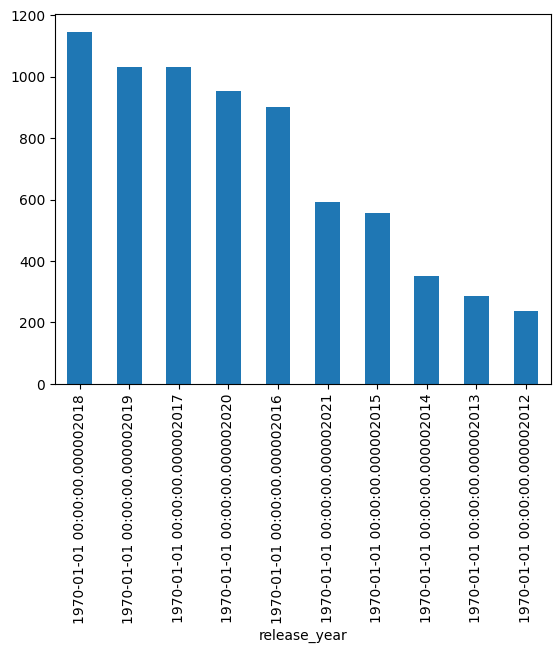

In [ ]:
year = Netflix_data.release_year.value_counts()
year[:10].plot(kind = 'bar')

Most of the movies are been released in 1970

<Axes: xlabel='country'>

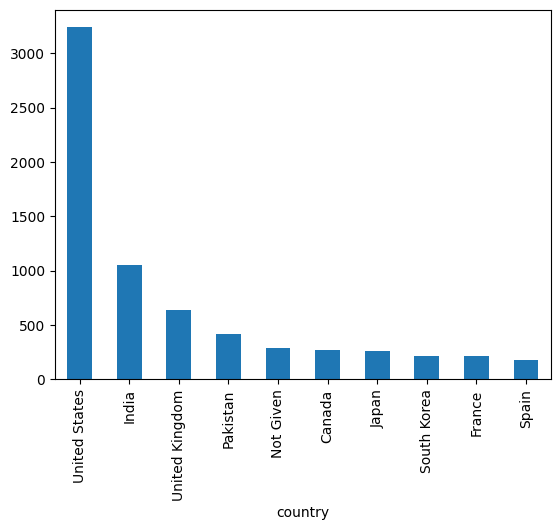

In [ ]:
top_10_country = Netflix_data.country.value_counts()
top_10_country[:10].plot(kind = 'bar')

<Axes: ylabel='count'>

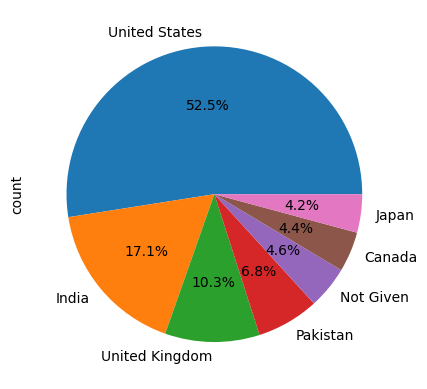

In [ ]:
data_country =Netflix_data.country.value_counts()
data_country[:7].plot(kind = 'pie',autopct ='%1.1f%%')

In [ ]:
Netflix_data.rating.value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


<Axes: xlabel='listed_in'>

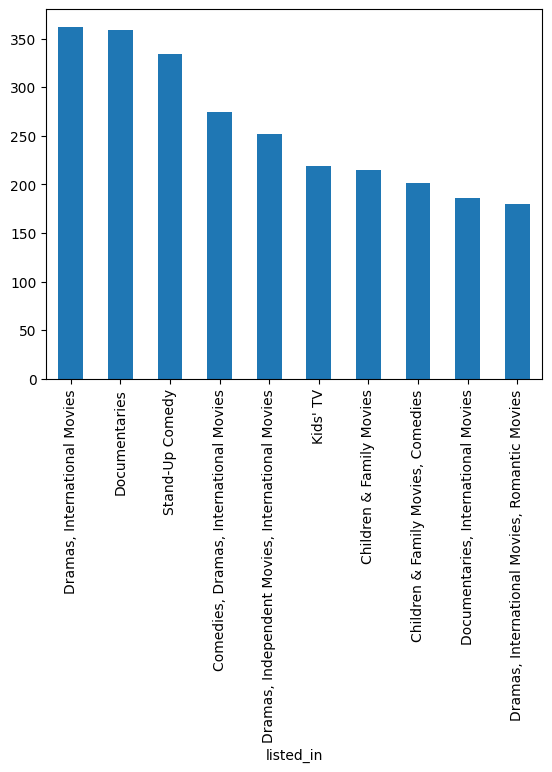

In [ ]:
# These are the top 10 listed categories and top is the Dramas and international movies.

top_10_types = Netflix_data.listed_in.value_counts()
top_10_types[:10].plot(kind = 'bar')

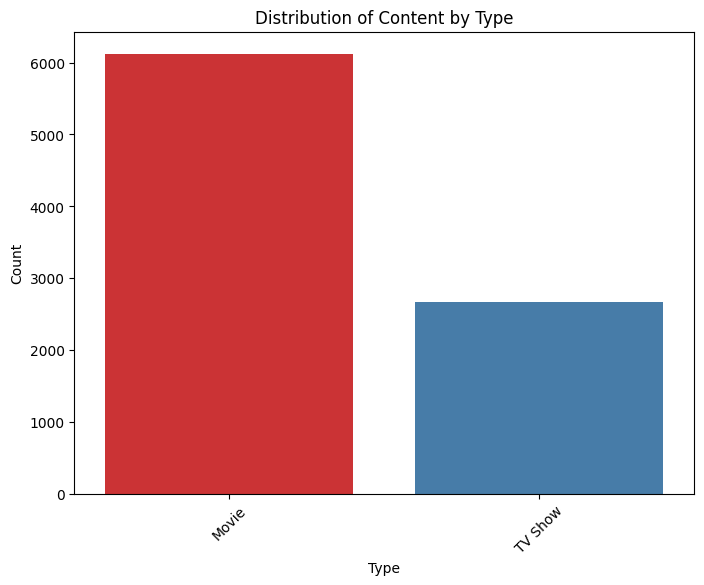

In [ ]:
# Count the number of Movies and TV Shows
type_counts = Netflix_data['type'].value_counts()
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set1', hue=type_counts.index)
plt.xticks(rotation=45)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


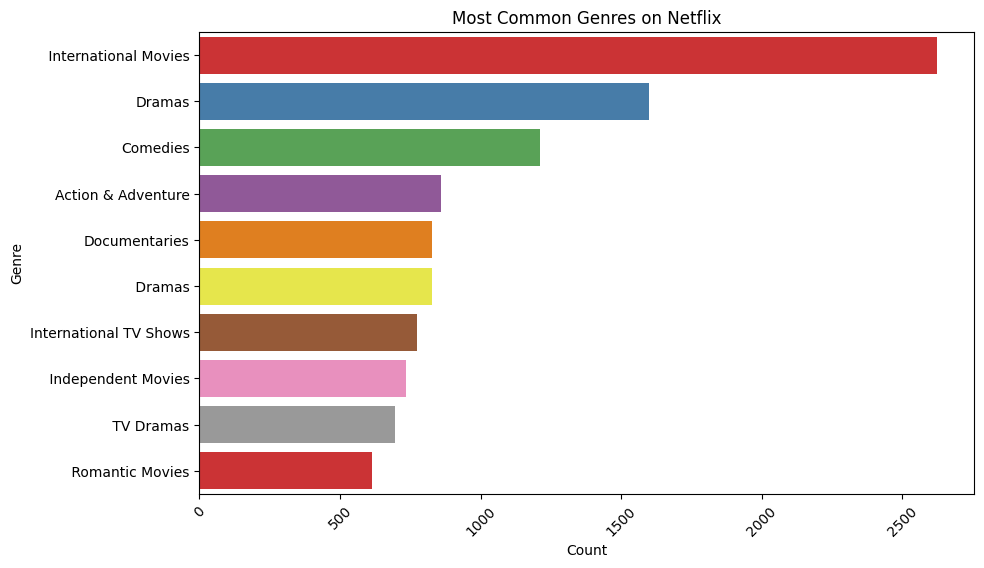

In [ ]:
# Split the 'listed_in' column and count genres
Netflix_data['genres'] = Netflix_data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(Netflix_data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set1',hue = genre_counts.index)
plt.xticks(rotation=45)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


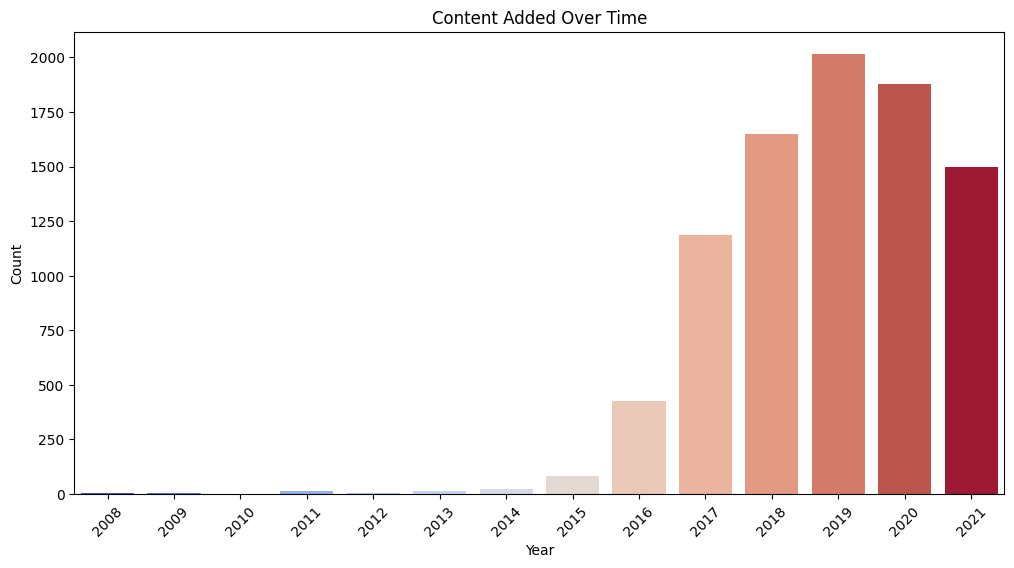

In [ ]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=Netflix_data, palette='coolwarm', hue='year_added', legend=False)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

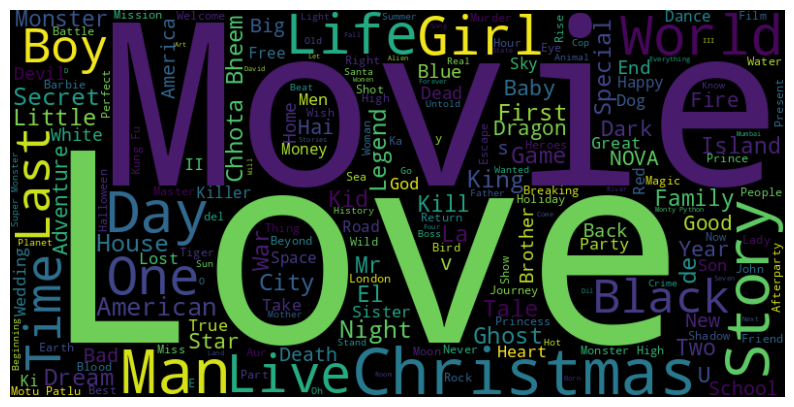

In [ ]:
# Generate word cloud
movie_titles = Netflix_data[Netflix_data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Visualization

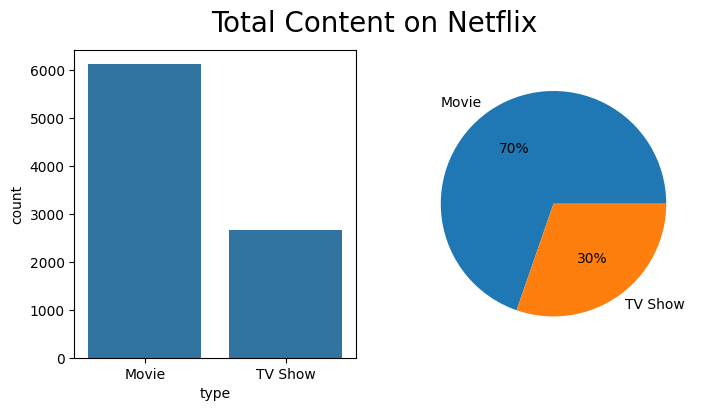

In [ ]:
freq=Netflix_data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(Netflix_data, x=Netflix_data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.show()

In [ ]:
ratings=Netflix_data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

Text(0.5, 0.98, 'Rating on Netflix')

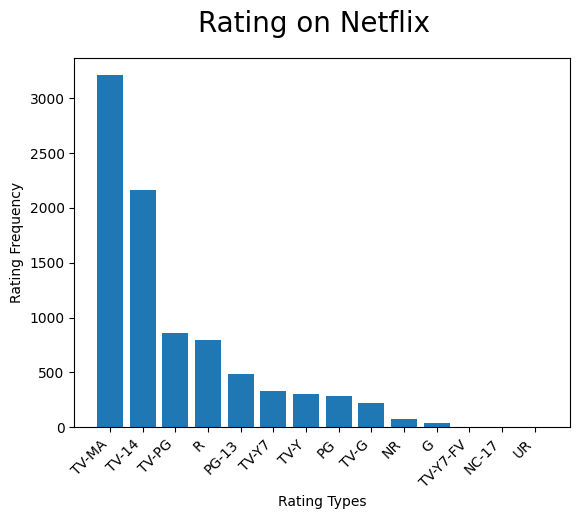

In [ ]:
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

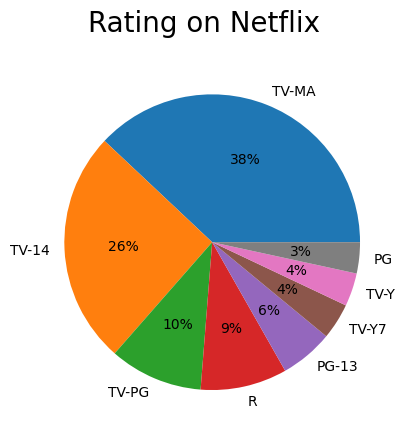

In [ ]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

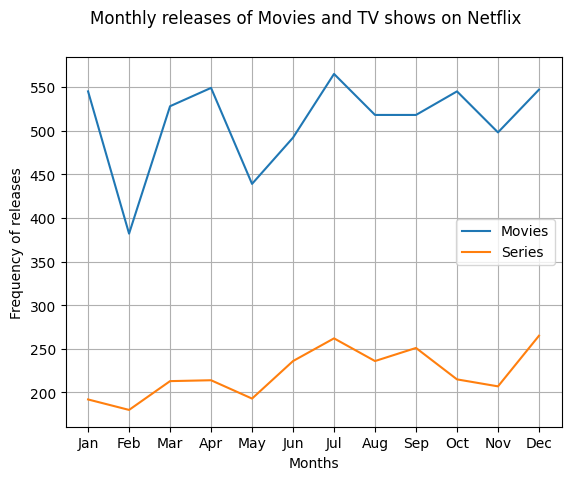

In [ ]:
# Monthly releases of Movies and TV shows on Netflix
monthly_movie_release=Netflix_data[Netflix_data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release=Netflix_data[Netflix_data['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')

plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

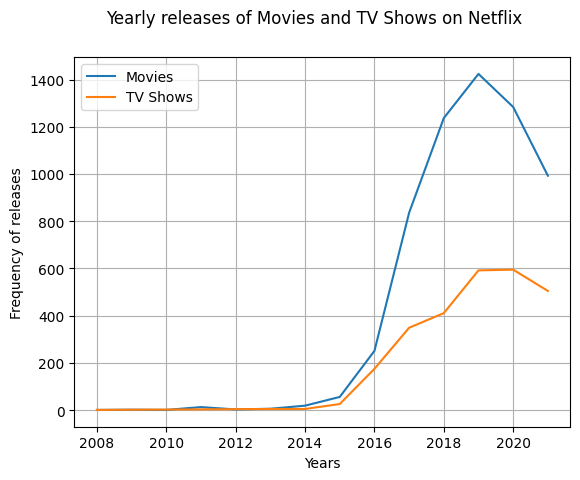

In [ ]:
# Yearly releases of Movies and TV Shows on Netflix
yearly_movie_releases=Netflix_data[Netflix_data['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_releases=Netflix_data[Netflix_data['type']=='TV Show']['year_added'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')

plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()


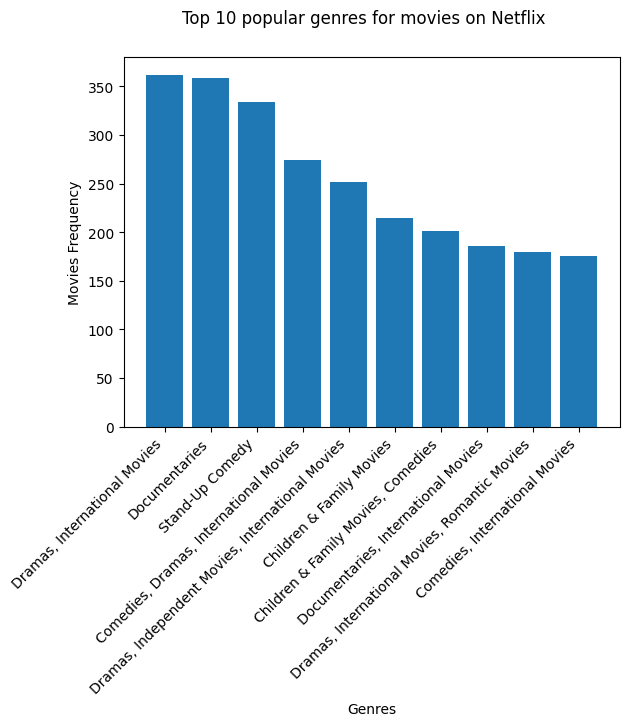

In [ ]:
# Top 10 popular movie genres
popular_movie_genre=Netflix_data[Netflix_data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=Netflix_data[Netflix_data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

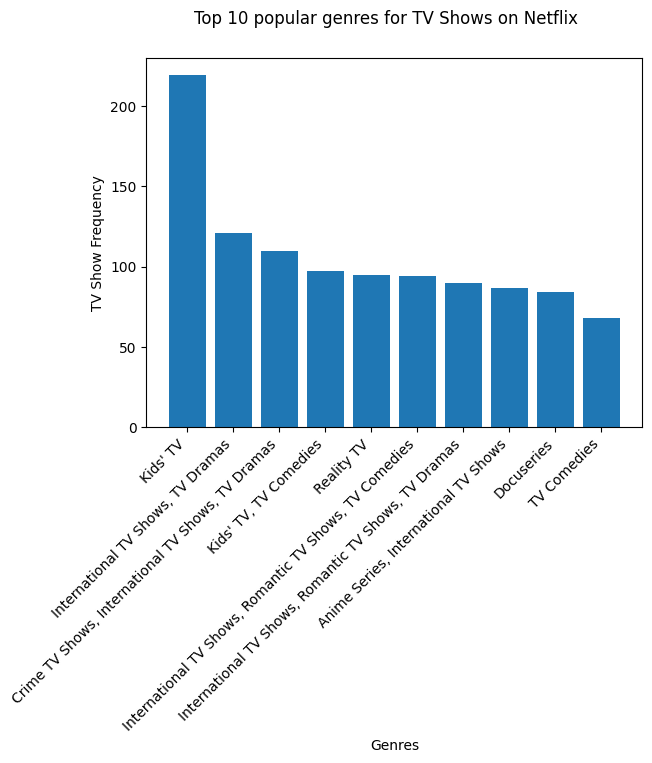

In [ ]:
# Top 10 TV Shows genres
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Show Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

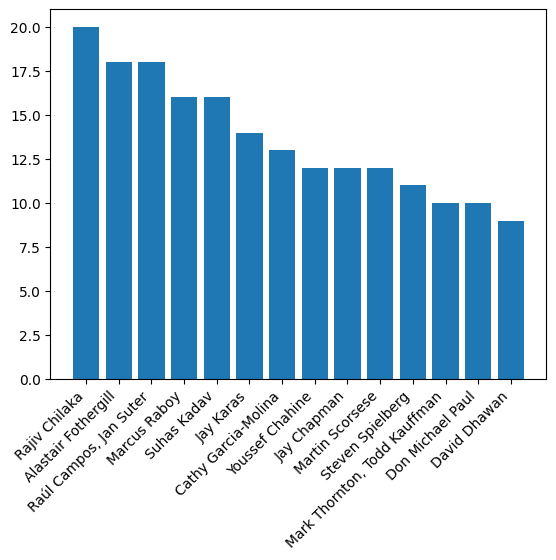

In [ ]:
# Top 15 directors across Netflix with high frequency of movies and shows.
directors=Netflix_data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')

# Conclusion
We conducted exploratory data analysis on the Netflix movie dataset and uncovered several valuable insights.
